In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Revisar data train


In [11]:
train = pd.read_csv(r"train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## a. Exploratory analysis with graphics
#### Creating un mapa de calor
For exploring missing data

<Axes: >

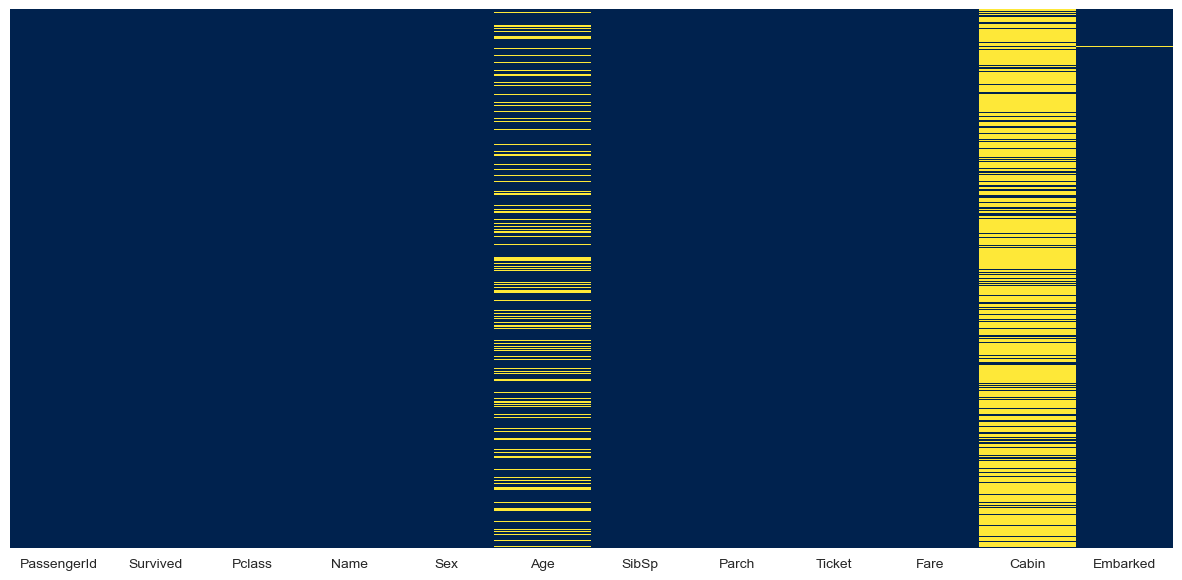

In [12]:
plt.figure(figsize=(15, 7))
#print(help(sns.heatmap))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26708\2340513364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

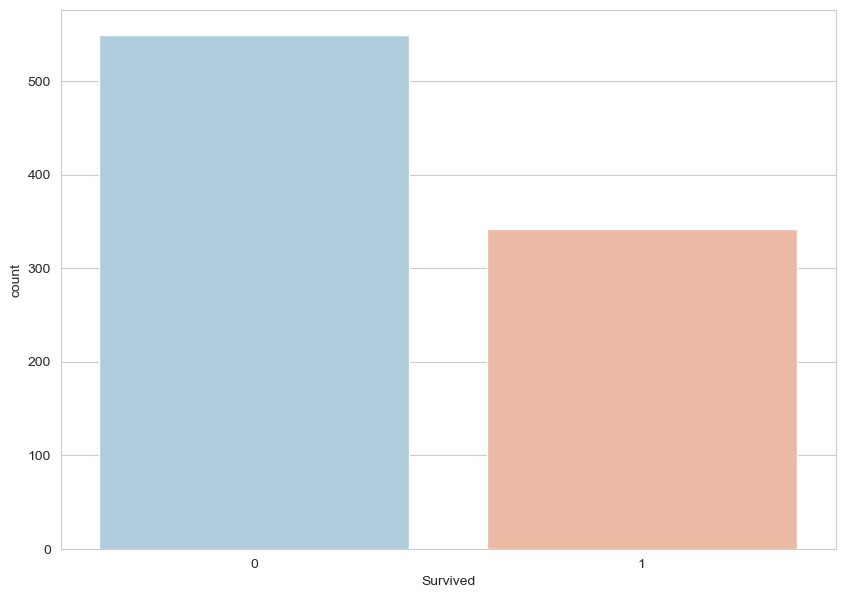

In [13]:
plt.figure(figsize=(10, 7)) #Tamaño ancho x alto
sns.set_style('whitegrid') #Añade una cuadricula
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

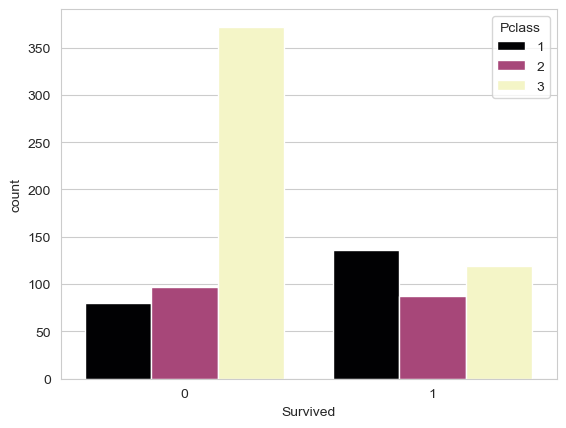

In [18]:
# Analizar por clase
sns.countplot(x='Survived',data=train,palette='magma', hue= 'Pclass')

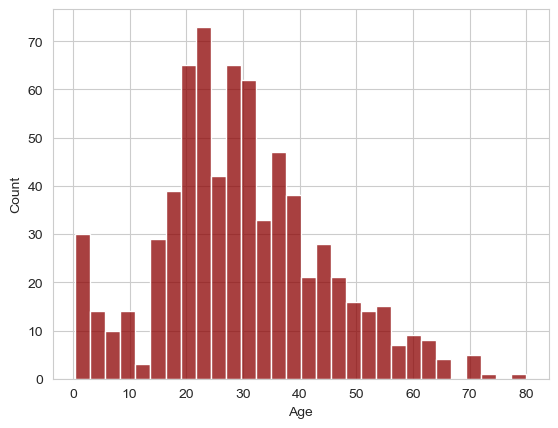

In [22]:
sns.histplot(train['Age'].dropna(),kde=False,color='darkred',bins=30);
# Histograma donde se usa la data de edad borrada, y mantienen 30 contenedores

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26708\2983095515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train, x = "SibSp", palette='RdBu_r')


<Axes: xlabel='SibSp', ylabel='count'>

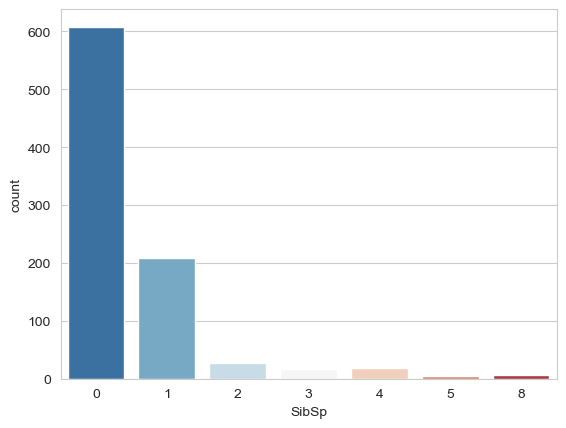

In [24]:
sns.countplot(data = train, x = "SibSp", palette='RdBu_r')

<Axes: xlabel='Fare', ylabel='Count'>

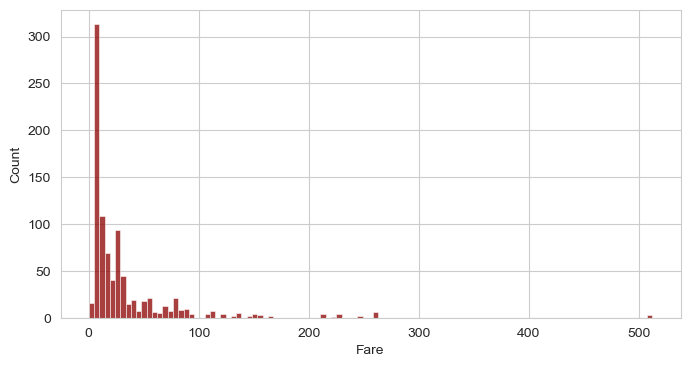

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(train['Fare'],kde=False,color='darkred')

In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## b. Data cleaning 

<Axes: xlabel='Pclass', ylabel='Age'>

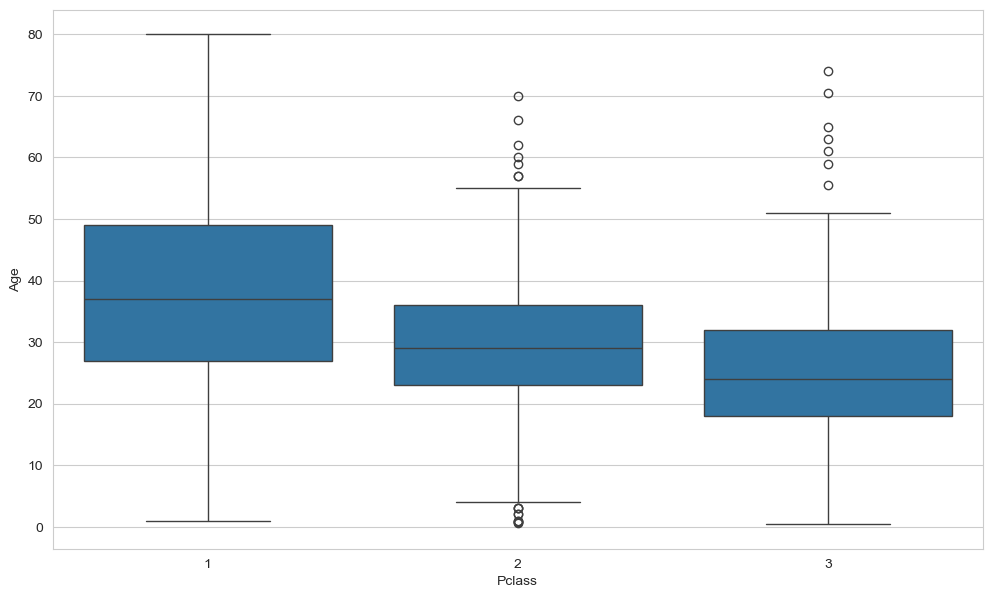

In [35]:
plt.figure(figsize=(12,7))
sns.boxplot(x= 'Pclass', y= 'Age', data= train)

In [36]:
print(train.groupby('Pclass')['Age'].mean())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [37]:
def cambiar(cols : list):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return 38
        
        if pclass == 2:
            return 30
        
        if pclass == 3:
            return 25
    else:
        return age

train['Age'] =  train[['Age', 'Pclass']].apply(cambiar, axis = 1)
#Aplica la funcion en el data frame y en las filas

        

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26708\3536045064.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26708\3536045064.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


<Axes: >

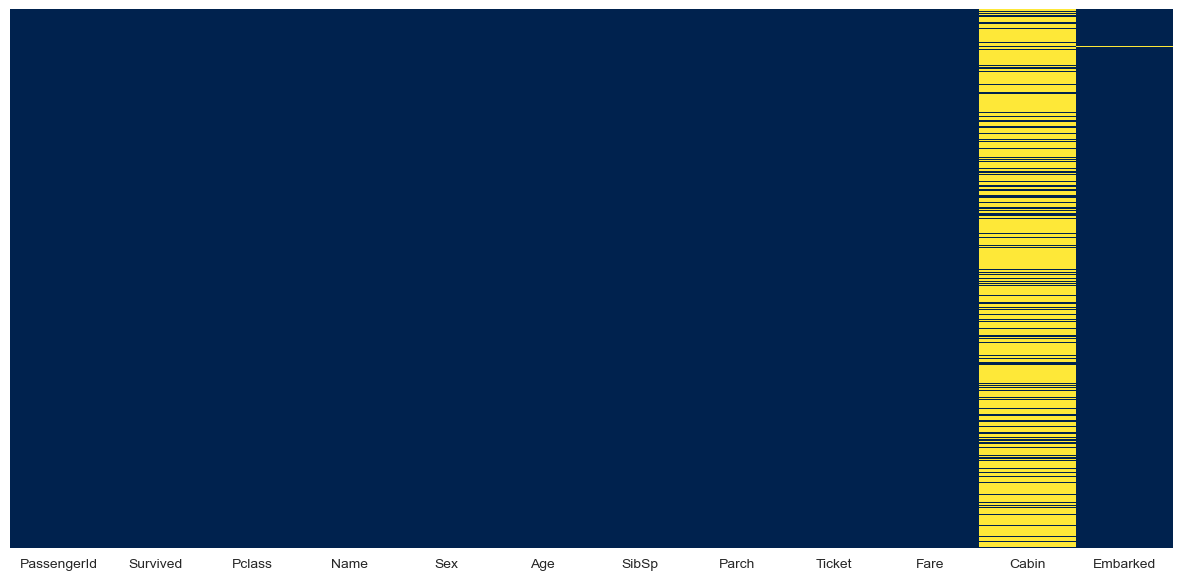

In [38]:
plt.figure(figsize=(15, 7))
#print(help(sns.heatmap))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [39]:
train.drop('Cabin', axis= 1, inplace = True)

<Axes: >

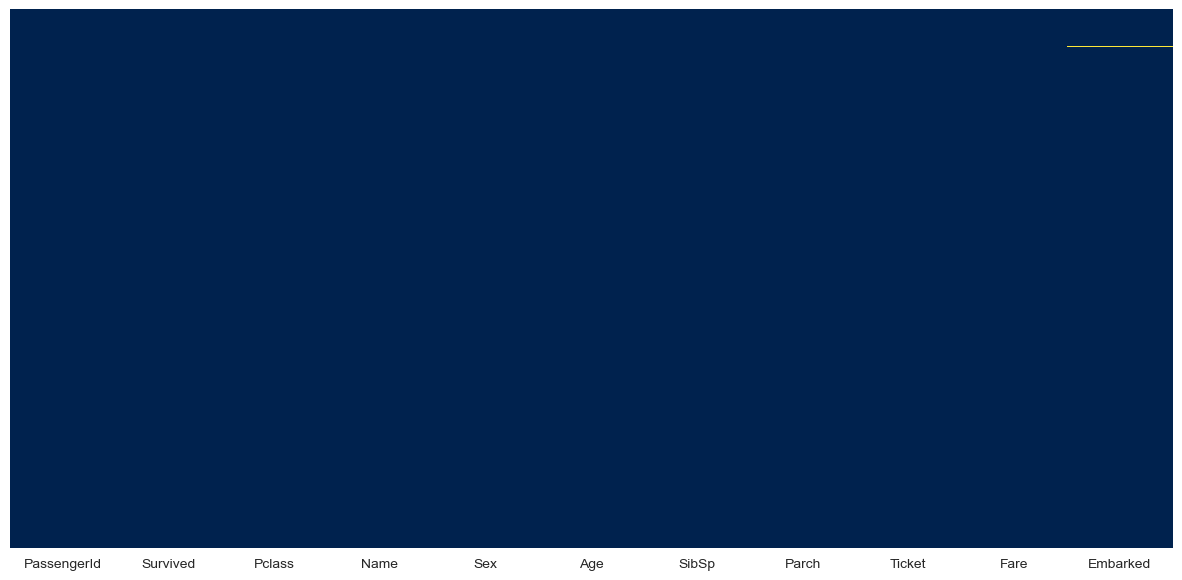

In [40]:
plt.figure(figsize=(15, 7))
#print(help(sns.heatmap))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')